<a href="https://colab.research.google.com/github/Shobhit2000/Hand_Tracker/blob/master/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone Repo**

In [1]:
! git clone https://github.com/Shobhit2000/Hand_Tracker.git

Cloning into 'Hand_Tracker'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 4817 (delta 1), reused 0 (delta 0), pack-reused 4812
Receiving objects: 100% (4817/4817), 287.63 MiB | 69.27 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (4806/4806), done.


**IMPORTS**

In [2]:
import cv2
import os
import numpy as np
import csv
from skimage import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense, Conv2D, Input, Flatten, Reshape, Conv2DTranspose, Dropout, MaxPooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K

Using TensorFlow backend.


**Initialize Paths**

In [0]:
x_train = []
x_test = []
y_train = []
y_test = []

train_path = "Hand_Tracker//dataset//train//"
test_path = "Hand_Tracker//dataset//test//"

img_dim_x = 360
img_dim_y = 640
output_dim = 8

**Create the Train folder**

[[323, 226, 412, 276, 257, 215, 311, 272], [348, 239, 428, 282, 216, 230, 277, 356], [365, 203, 456, 260, 295, 187, 359, 248], [326, 211, 412, 263, 263, 197, 323, 256], [305, 216, 392, 271, 219, 193, 300, 260], [293, 222, 389, 278, 222, 197, 295, 270], [308, 222, 400, 282, 228, 197, 307, 272], [328, 230, 423, 284, 258, 193, 330, 265], [324, 226, 418, 278, 255, 192, 328, 261], [319, 219, 412, 274, 238, 181, 298, 244], [324, 218, 415, 265, 259, 197, 318, 259], [333, 201, 428, 256, 273, 191, 334, 256], [322, 208, 411, 261, 256, 192, 316, 256], [329, 214, 416, 264, 242, 185, 306, 249], [332, 228, 416, 278, 241, 193, 307, 262], [336, 230, 426, 286, 258, 193, 332, 262], [323, 214, 413, 268, 255, 189, 314, 251], [322, 214, 409, 266, 251, 185, 319, 254], [315, 177, 409, 226, 255, 155, 315, 216], [313, 181, 398, 240, 230, 203, 297, 333], [321, 176, 416, 229, 253, 159, 322, 224], [293, 190, 382, 241, 218, 168, 292, 233], [287, 193, 373, 244, 210, 170, 286, 234], [311, 181, 396, 238, 248, 168, 31

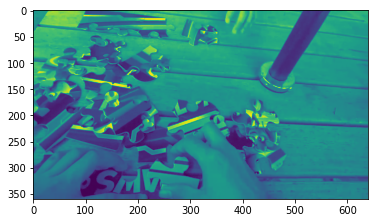

In [4]:
for root, dirs, filename in os.walk(train_path):
    for x in filename:
        if x == 'annotations.csv':
            with open(os.path.join(train_path, 'annotations.csv'), 'r') as f:
                csv_reader = csv.reader(f)
                for row in csv_reader:
                  for i in range(len(row)):
                    if row[i].find('.') != -1:
                      row[i] = int(row[i][:row[i].find('.')])
                    else:
                      row[i] = int(row[i])
                  y_train.append(row)
        else:
            img = io.imread(os.path.join(train_path, x), as_gray=True)
            img = img / 255
            img = np.asarray(img)
            x_train.append(img)

print(y_train)
plt.imshow(x_train[1])
plt.show()

**Create the Test folder**

[[289, 80, 359, 136, 203, 84, 270, 144], [196, 89, 274, 163, 19, 107, 114, 197], [185, 90, 293, 159, 73, 95, 163, 171], [270, 57, 345, 124, 156, 61, 225, 129], [338, 54, 414, 130, 172, 31, 261, 90], [358, 66, 428, 165, 218, 65, 325, 143], [329, 53, 407, 121, 240, 94, 365, 202], [327, 62, 392, 130, 216, 76, 335, 153], [319, 47, 395, 119, 188, 47, 288, 114], [406, 80, 499, 199, 224, 83, 356, 193], [357, 61, 467, 159, 191, 55, 304, 174], [349, 78, 438, 179, 173, 70, 274, 205], [341, 53, 438, 171, 115, 67, 233, 185], [279, 33, 334, 104, 130, 69, 232, 182], [325, 16, 378, 84, 185, 22, 281, 86], [290, 97, 393, 203, 177, 58, 285, 140], [410, 96, 513, 204, 257, 66, 367, 174], [422, 89, 525, 193, 285, 78, 403, 191], [438, 71, 532, 187, 299, 84, 435, 194], [456, 76, 559, 167, 340, 106, 485, 237], [387, 71, 458, 198, 136, 25, 235, 116], [307, 2, 422, 54, 170, 3, 249, 35], [464, 11, 538, 85, 267, 1, 368, 49], [366, 17, 446, 72, 264, 4, 355, 44], [434, 13, 494, 65, 287, 20, 374, 89], [402, 9, 461, 

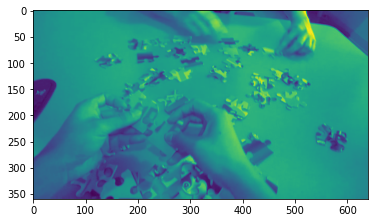

In [5]:
for root, dirs, filename in os.walk(test_path):
    for x in filename:
        if x == 'test_annotations.csv':
            with open(os.path.join(test_path, 'test_annotations.csv'), 'r') as f:
                csv_reader = csv.reader(f)
                for row in csv_reader:
                  for i in range(len(row)):
                    if row[i].find('.') != -1:
                      row[i] = int(row[i][:row[i].find('.')])
                    else:
                      row[i] = int(row[i])
                  y_test.append(row)
        else:
            img = io.imread(os.path.join(test_path, x), as_gray=True)
            img = img / 255
            img = np.asarray(img)
            x_test.append(img)

print(y_test)
# te = cv2.cvtColor(x_test[1], cv2.COLOR_BGR2RGB)
plt.imshow(x_test[1])
plt.show()

In [6]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4700, 360, 640)
(4700, 8)
(100, 360, 640)
(100, 8)


In [7]:
x_train = x_train.reshape(x_train.shape[0], img_dim_x, img_dim_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_dim_x, img_dim_y, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4700, 360, 640, 1)
(4700, 8)
(100, 360, 640, 1)
(100, 8)


**Model Architecture**

In [8]:
inputs = Input(shape=(img_dim_x, img_dim_y, 1), name='Hand_Tracker_Model')

x = Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x = Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x = Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x = Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x = Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

shape = K.int_shape(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
coordinates = Dense(output_dim, activation='relu', name='img_coordinates')(x)

Tracker_Model = Model(inputs, coordinates, name='Hand_Tracker_Model')
Tracker_Model.summary()

Model: "Hand_Tracker_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hand_Tracker_Model (InputLay (None, 360, 640, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 360, 640, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 180, 320, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 320, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 160, 128)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 160, 256)      295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 80, 256)

In [0]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, verbose=1, min_lr=0.05)
Tracker_Model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])

In [10]:
Tracker_Model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=47, shuffle=True)

Train on 4700 samples, validate on 100 samples
Epoch 1/30
4700/4700 [==============================] - 807s 172ms/step - loss: 28623.5544 - accuracy: 0.8002 - val_loss: 7093.5462 - val_accuracy: 0.9800
Epoch 2/30
4700/4700 [==============================] - 795s 169ms/step - loss: 8504.2424 - accuracy: 0.9251 - val_loss: 7416.3810 - val_accuracy: 0.9800
Epoch 3/30
4700/4700 [==============================] - 790s 168ms/step - loss: 8277.1249 - accuracy: 0.9251 - val_loss: 6531.0417 - val_accuracy: 0.9800
Epoch 4/30
4700/4700 [==============================] - 786s 167ms/step - loss: 8264.6347 - accuracy: 0.9251 - val_loss: 7072.8423 - val_accuracy: 0.9800
Epoch 5/30
4700/4700 [==============================] - 784s 167ms/step - loss: 8226.0594 - accuracy: 0.9251 - val_loss: 7250.4804 - val_accuracy: 0.9800
Epoch 6/30
4700/4700 [==============================] - 786s 167ms/step - loss: 8278.8267 - accuracy: 0.9251 - val_loss: 7311.1059 - val_accuracy: 0.9800
Epoch 7/30
4700/4700 [======

KeyboardInterrupt: ignored

In [0]:
Tracker_Model.save("Tracker_Model.h5")
Tracker_Model.save_weights("Tracker_Model_weights.h5")

In [0]:
from google.colab import files
files.download('Tracker_Model.h5')